In [1]:
using Random, StatsBase, CairoMakie, Revise, Statistics

In [2]:
includet("../StupidDiceTricksRepo/DiceTricks.jl")
includet("../StupidDiceTricksRepo/Yahtzee.jl")

In [3]:
using .DiceTricks, .Yahtzee

### DiceTricks

In [4]:
control = rolltrials(roll_die, 1_000_000)

1000000-element Vector{Int64}:
 6
 1
 1
 4
 3
 2
 5
 6
 1
 4
 ⋮
 2
 5
 2
 3
 5
 3
 4
 3
 1

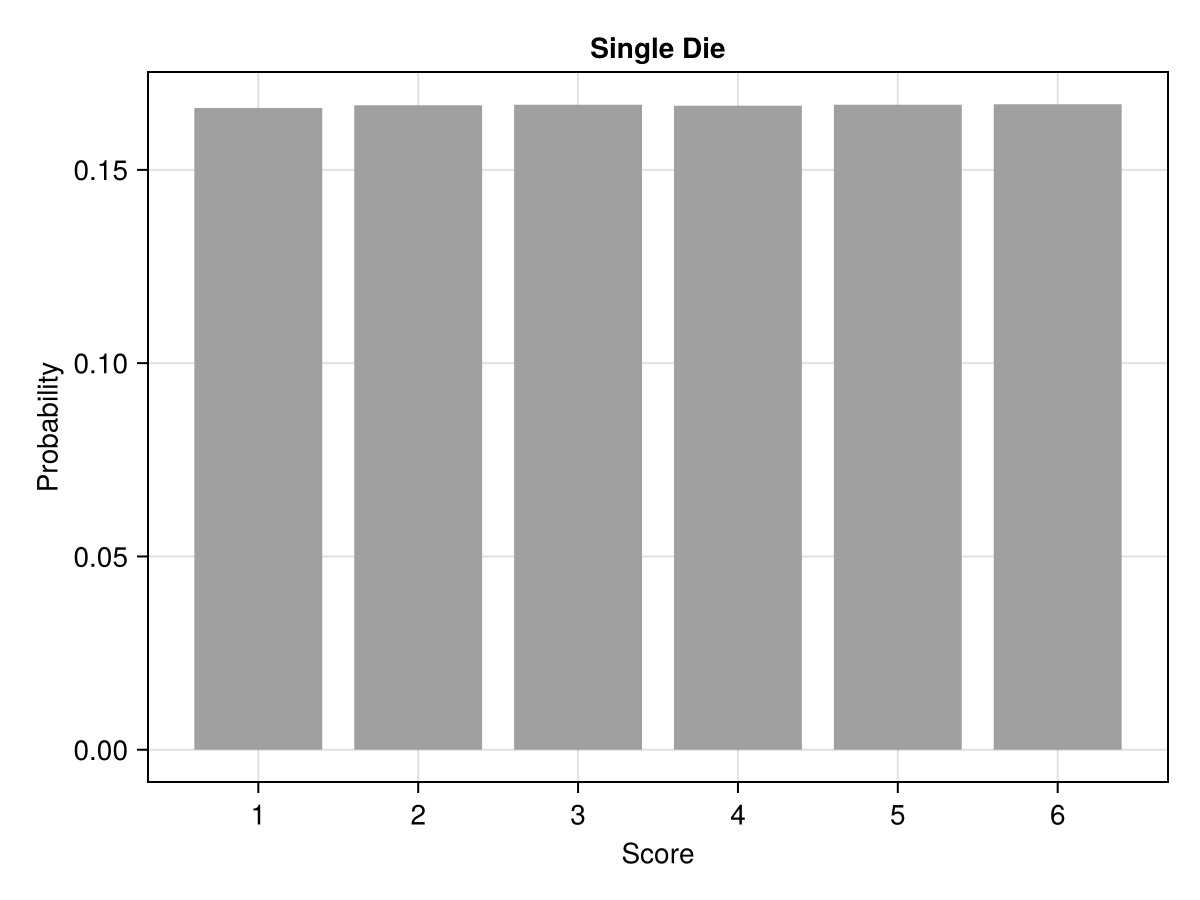

In [5]:
barplot(counts(control)./1_000_000,
        color = "#a0a0a0",
        axis = (xticks = 1:6, xlabel = "Score",
        yticks = 0:0.05:0.20, ylabel = "Probability",
        title = "Single Die")
    )

In [6]:
analyze_results(control)


Results Summary:
Number of games: 1000000
Average score: 3.502464
Minimum score: 1
Maximum score: 6
Standard Deviation: 1.7073496548003408


In [7]:
ex = rolltrials(explode, 1_000_000)

1000000-element Vector{Int64}:
  3
  3
 14
  3
  1
  4
  5
  4
  1
  5
  ⋮
  1
  1
  2
  2
  3
 11
  4
  5
  3

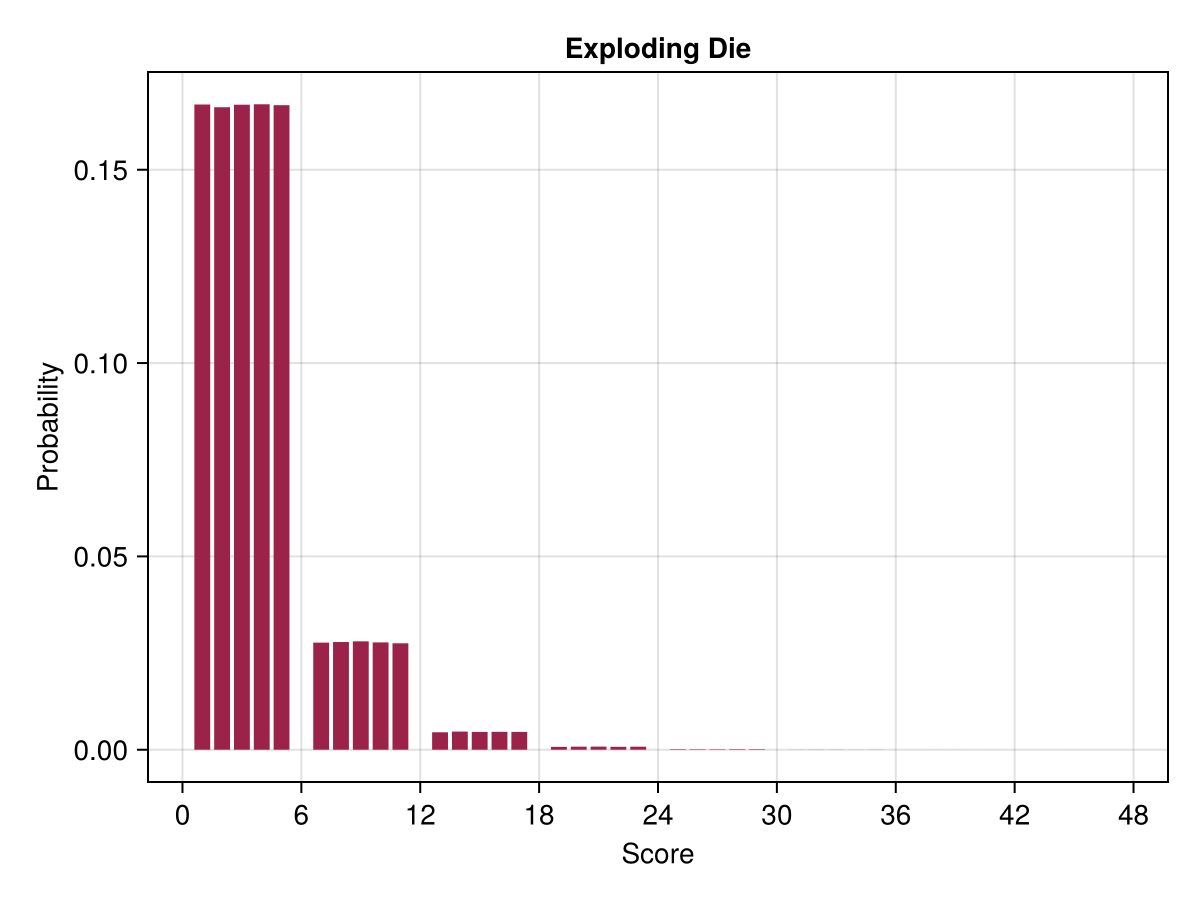

In [8]:
barplot(counts(ex)./1_000_000,
        color = "#9b2248",
        axis = (xlabel = "Score", xticks = 0:6:50,
        ylabel = "Probability",
        title = "Exploding Die")
    )

In [9]:
analyze_results(ex)


Results Summary:
Number of games: 1000000
Average score: 4.199098
Minimum score: 1
Maximum score: 47
Standard Deviation: 3.2606386825529463


In [10]:
dc = rolltrials(implode, 1_000_000)

1000000-element Vector{Int64}:
 43
 18
 23
 47
 20
 31
  7
  8
  6
  1
  ⋮
  1
 22
 50
  5
 10
 34
  7
 15
  1

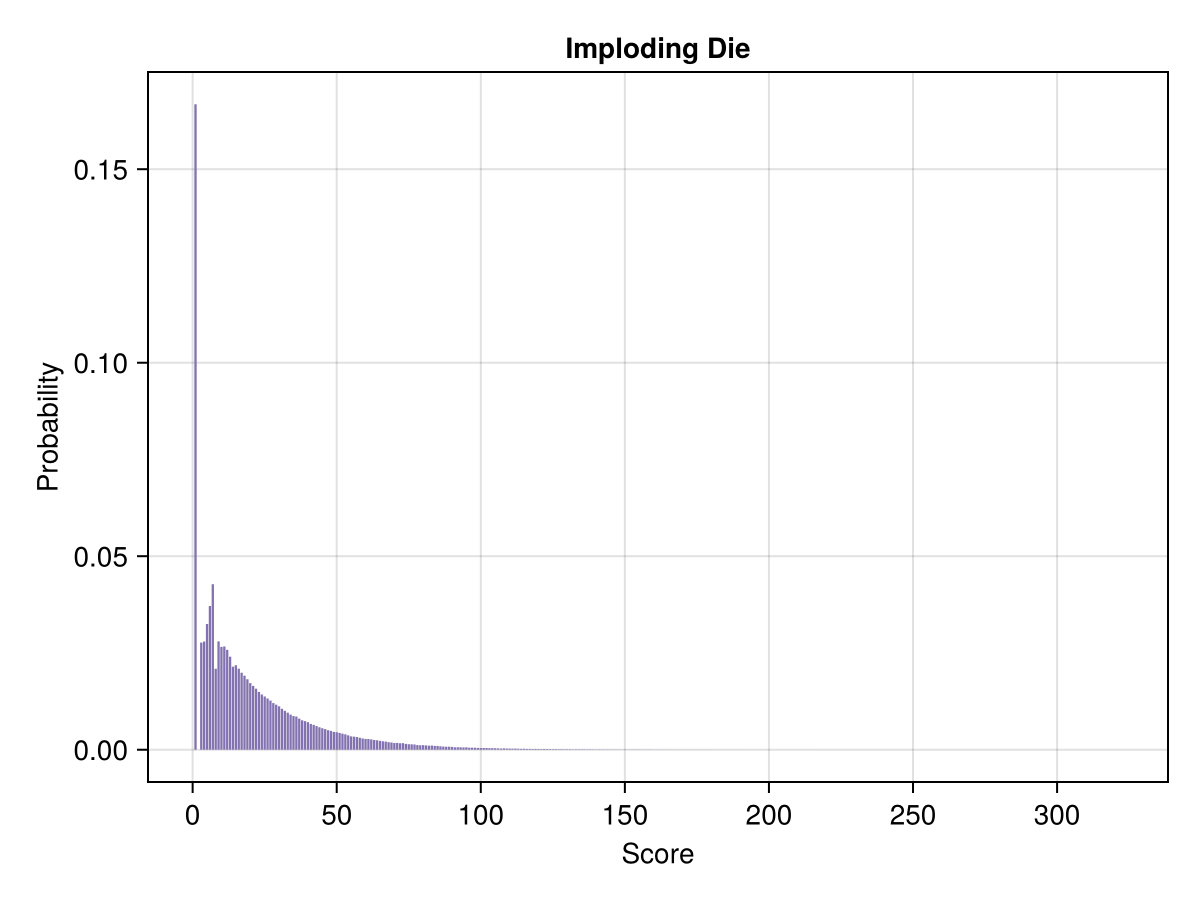

In [11]:
barplot(counts(dc)./1_000_000,
        color = "#8272af",
        axis = (xlabel = "Score", xticks = 0:50:300,
        ylabel = "Probability",
        title = "Imploding Die")
    )

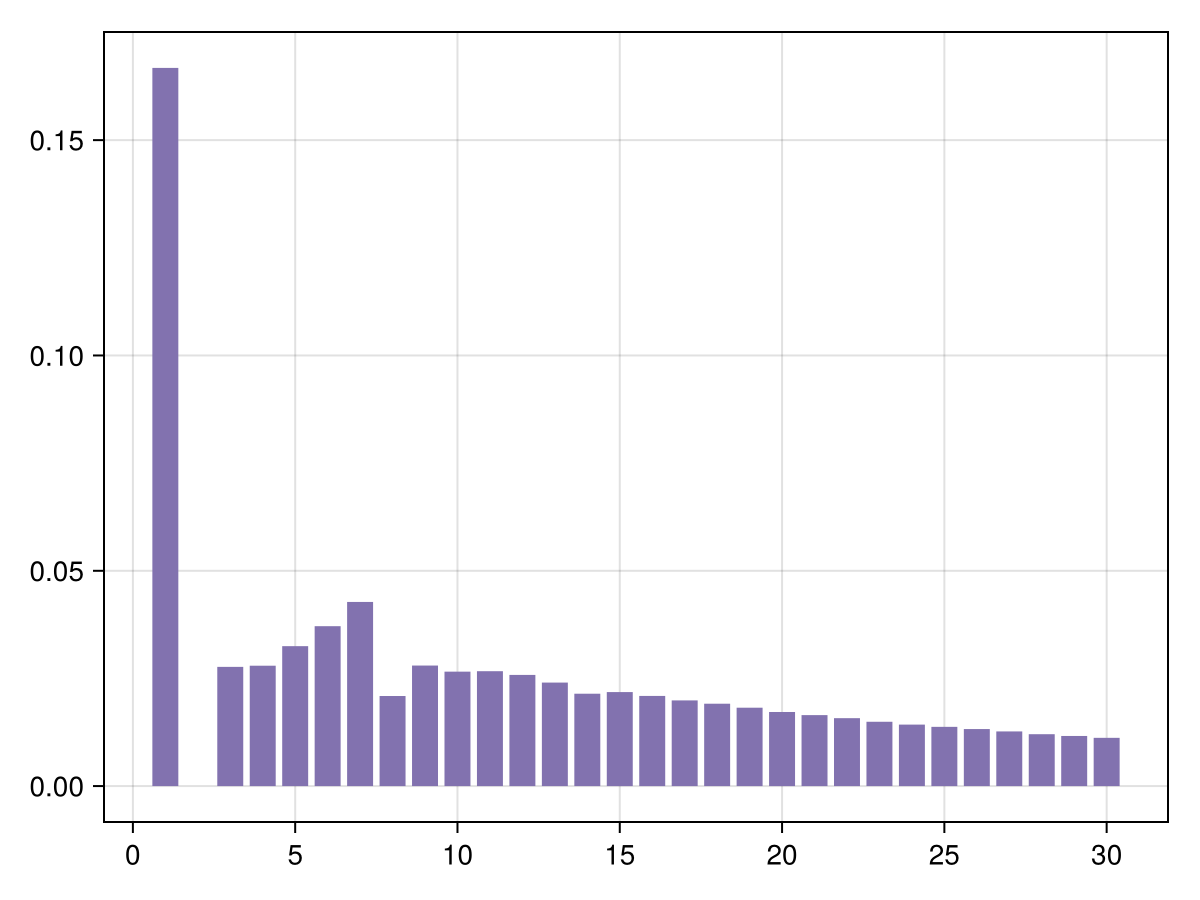

In [12]:
barplot(first(counts(dc), 30)./1_000_000,
    axis = (xticks = 0:5:30, yticks = 0:0.05:0.15, title=""),
        color = "#8272af",
    )

In [13]:
analyze_results(dc)


Results Summary:
Number of games: 1000000
Average score: 20.959327
Minimum score: 1
Maximum score: 322
Standard Deviation: 22.09588986520841


In [14]:
sys = simulate_shoot_your_shot(1_000_000);

In [15]:
analyze_results(sys)


Results Summary:
Number of games: 1000000
Average score: 410.303378
Minimum score: 20
Maximum score: 3010
Standard Deviation: 229.89239747391284


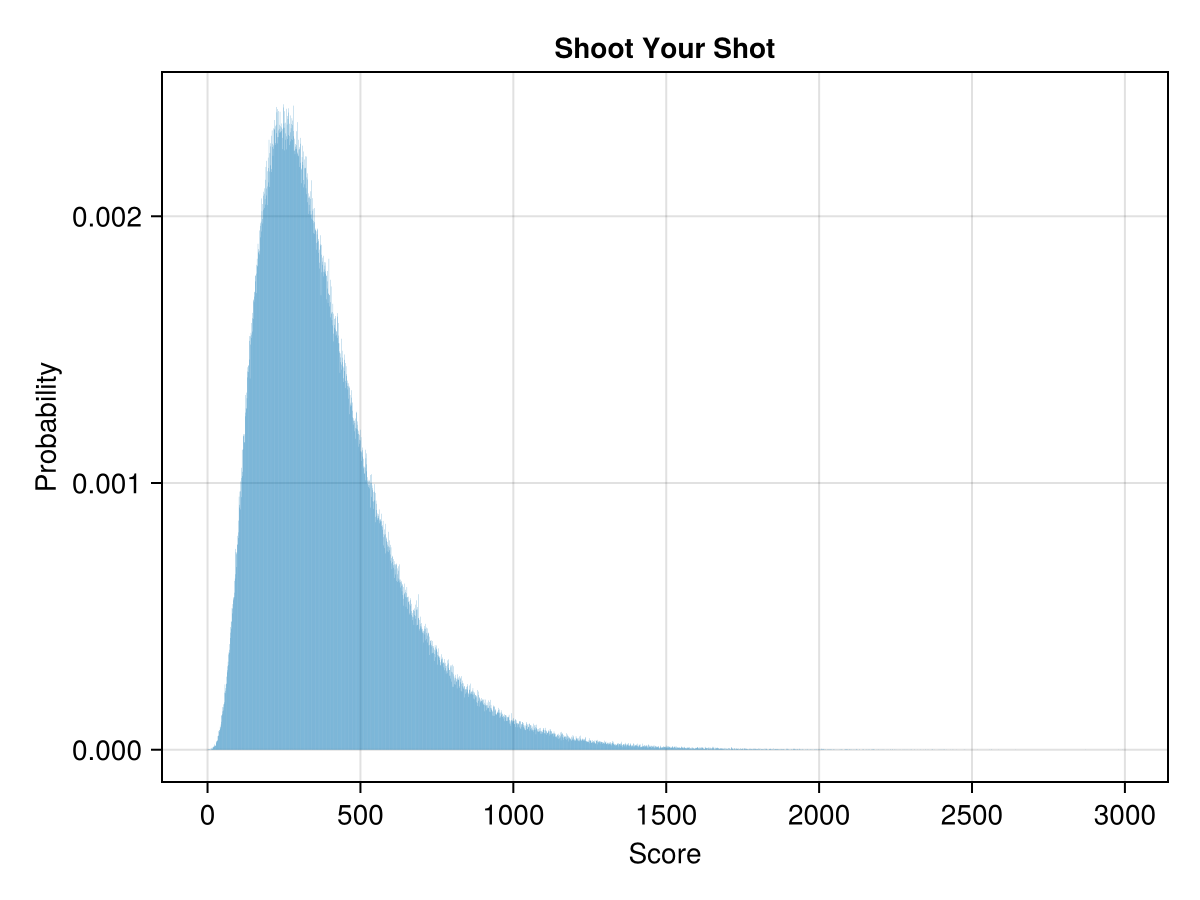

In [16]:
barplot(counts(sys)./1_000_000,
        axis = (xlabel = "Score", xticks = 0:500:3000,
        ylabel = "Probability",
        title = "Shoot Your Shot")
    )

### Yahtzee

#### Initial Roll

In [42]:
function playYahtzee(trials::Integer)
    local results = Vector[]
    for i = 1:trials
        push!(results, rollPool())
    end
    return results
end

playYahtzee (generic function with 1 method)

In [43]:
iscores = Int[]
iscoretypes = String[]
t = playYahtzee(1_000_000)
s = scorePool.(t)
for i = 1:1_000_000
    push!(iscores, s[i][1])
    push!(iscoretypes, s[i][2])
end

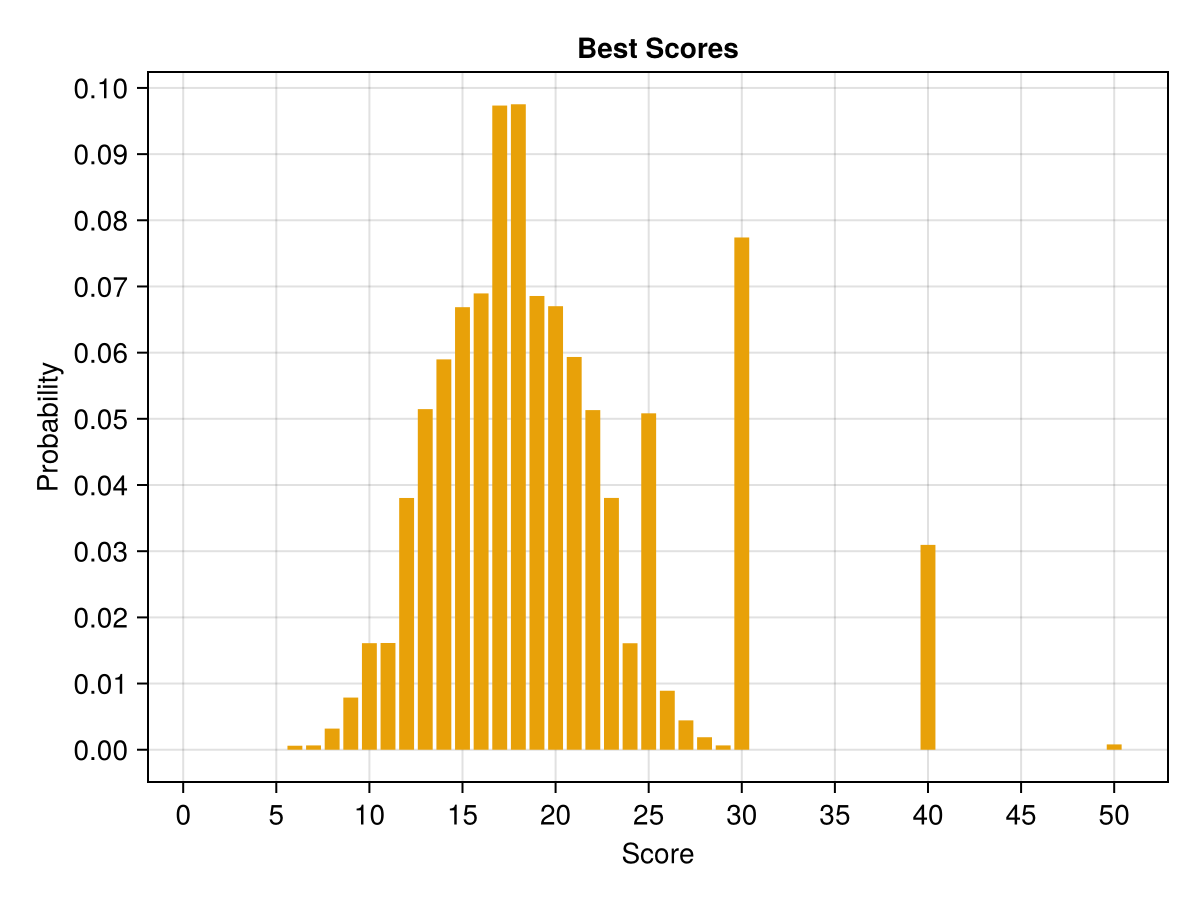

In [44]:
barplot(counts(iscores, 50)./1_000_000,
        color = "#e8a109",
        axis = (xticks = 0:5:50, yticks = 0:0.01:1,
        xlabel = "Score", ylabel = "Probability",
        title = "Best Scores")
    )

In [45]:
analyze_results(iscores)


Results Summary:
Number of games: 1000000
Average score: 19.484918
Minimum score: 6
Maximum score: 50
Standard Deviation: 6.258881825604131


In [46]:
d = countmap(iscoretypes)
scoretypes = ["Three Of A Kind", "Four Of A Kind", "Full House", "Low Straight", "High Straight", "Yahtzee", "Chance"]
iscorecounts = Int[]
for i in scoretypes
    push!(iscorecounts, get!(d, i, 0))
end
iscorepers = iscorecounts./1_000_000

7-element Vector{Float64}:
 0.158054
 0.019291
 0.034763
 0.077403
 0.030952
 0.000803
 0.678734

In [47]:
@show hcat(scoretypes, iscorepers)

hcat(scoretypes, iscorepers) = Any["Three Of A Kind" 0.158054; "Four Of A Kind" 0.019291; "Full House" 0.034763; "Low Straight" 0.077403; "High Straight" 0.030952; "Yahtzee" 0.000803; "Chance" 0.678734]


7×2 Matrix{Any}:
 "Three Of A Kind"  0.158054
 "Four Of A Kind"   0.019291
 "Full House"       0.034763
 "Low Straight"     0.077403
 "High Straight"    0.030952
 "Yahtzee"          0.000803
 "Chance"           0.678734

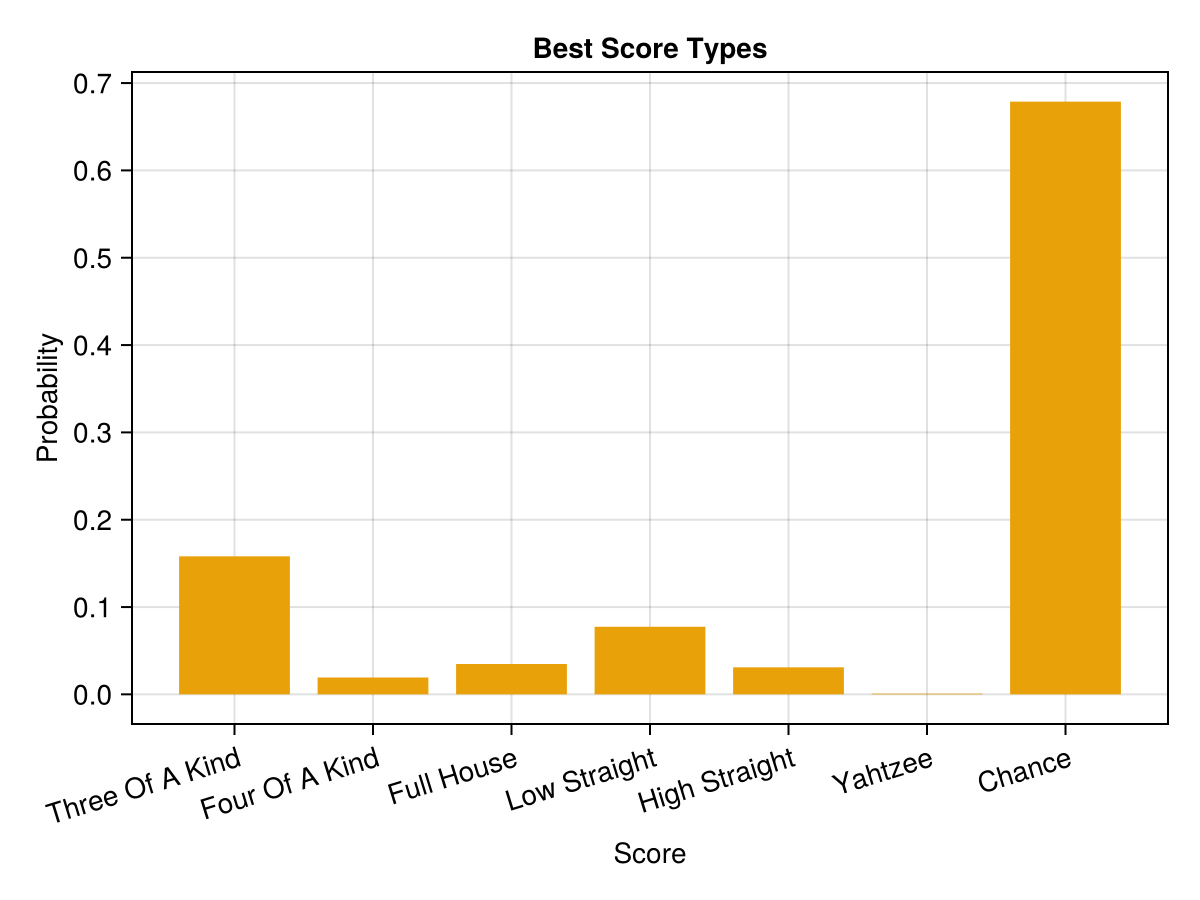

In [48]:
barplot(iscorepers, color = "#e8a109",
            axis = (xticks = (1:7, scoretypes),
            xticklabelrotation = 0.3,
            yticks = 0:0.1:1,
            xlabel = "Score", ylabel = "Probability",
            title = "Best Score Types"))

#### Unique Strategy

In [49]:
sscores = Int[]
sscoretypes = String[]
t = playYahtzee(1_000_000)
s = scorePool.(t)
for i = 1:1_000_000
    push!(sscores, s[i][1])
    push!(sscoretypes, s[i][2])
end
straight1 = scorePool.(rerollForStraight.(rerollForStraight.(t)))
sscores = Int[]
stypes = String[]
for i = 1:length(straight1)
    push!(sscores, straight1[i][1])
    push!(stypes, straight1[i][2])
end

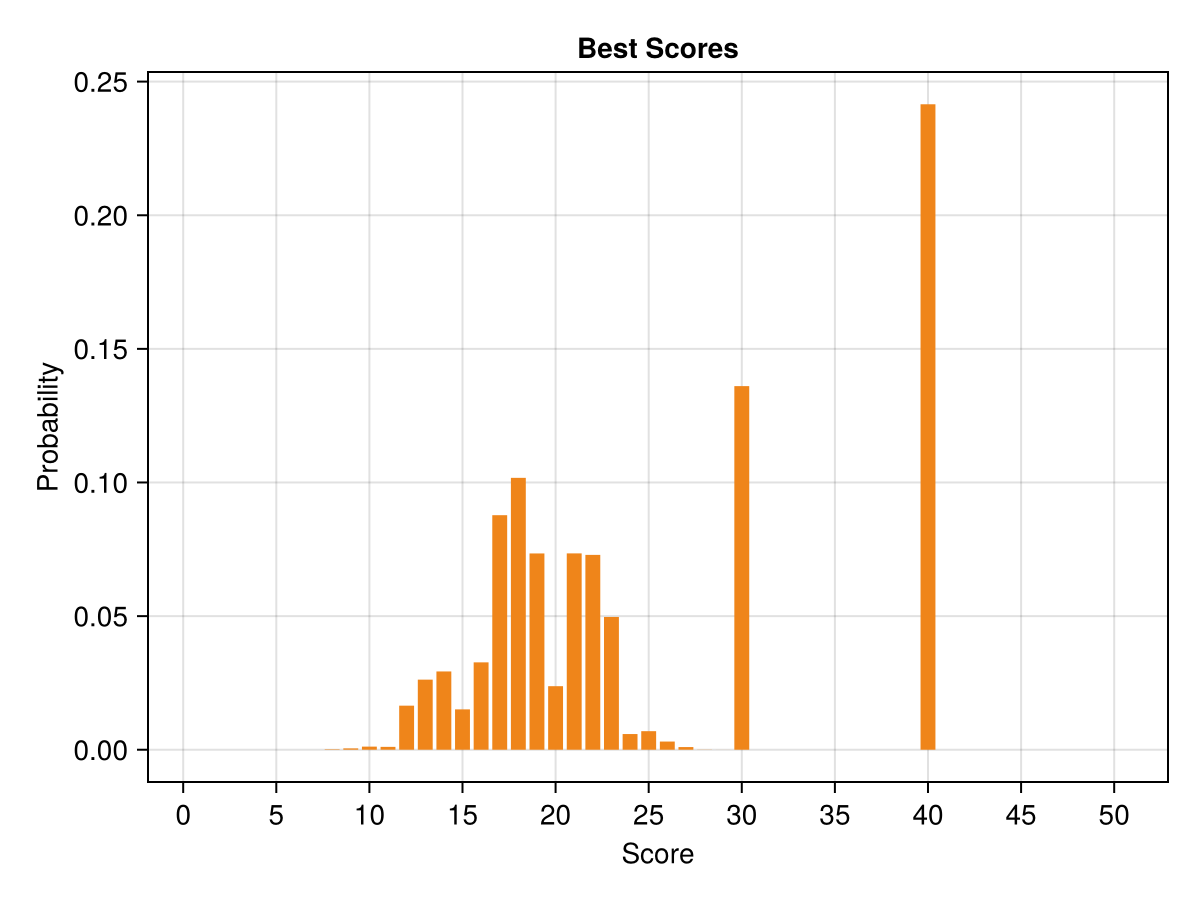

In [50]:
barplot(counts(sscores, 50)./1_000_000,
        color = "#ef851a",
        axis = (xticks = 0:5:50, yticks = 0:0.05:1,
        xlabel = "Score", ylabel = "Probability",
        title = "Best Scores")
    )

In [51]:
analyze_results(sscores)


Results Summary:
Number of games: 1000000
Average score: 25.376901
Minimum score: 7
Maximum score: 40
Standard Deviation: 9.402281161457044


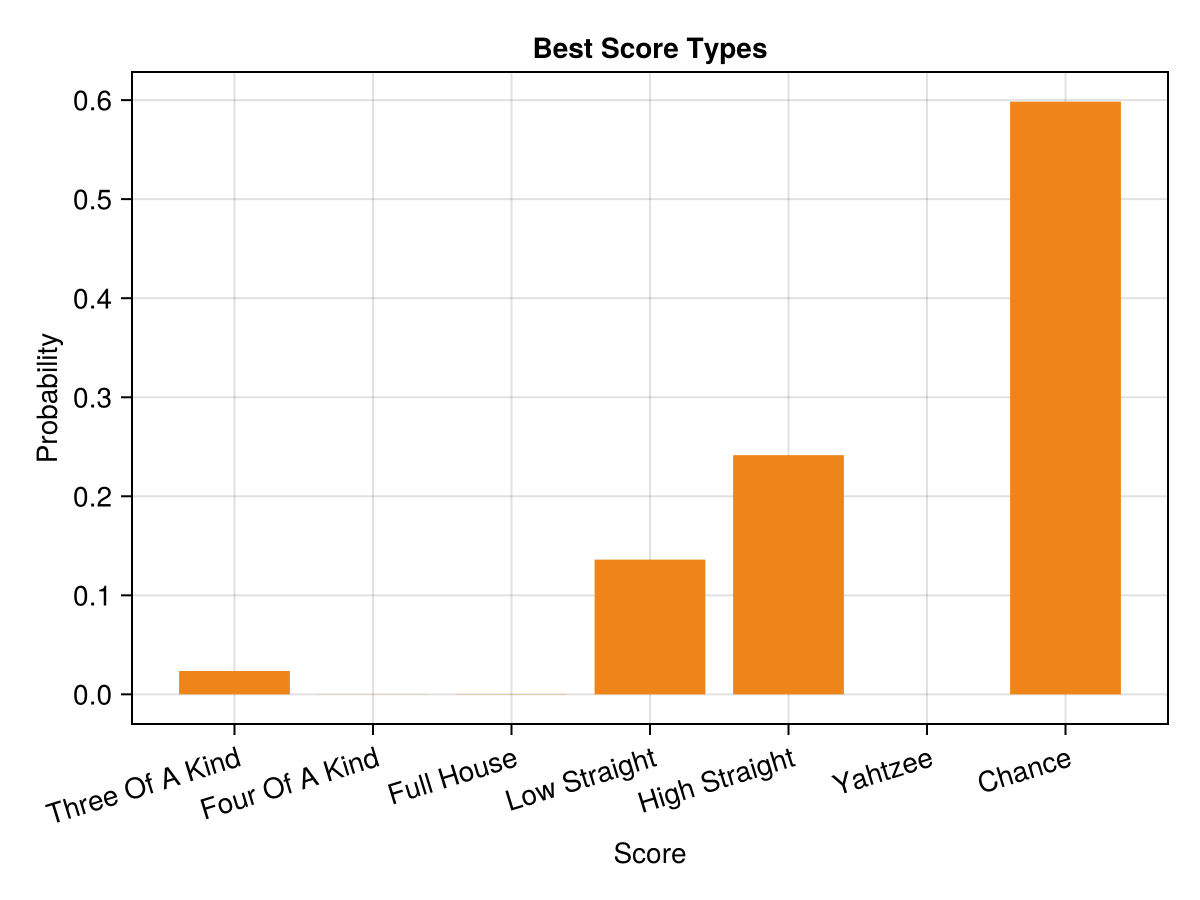

In [52]:
d = countmap(stypes)
scoretypes = ["Three Of A Kind", "Four Of A Kind", "Full House", "Low Straight", "High Straight", "Yahtzee", "Chance"]
sscorecounts = Int[]
for i in scoretypes
    push!(sscorecounts, get!(d, i, 0))
end
sscorepers = sscorecounts./1_000_000
barplot(sscorepers, color = "#ef851a",
    axis = (xticks = (1:7, scoretypes),
            xticklabelrotation = 0.3,
            yticks = 0:0.1:1,
            xlabel = "Score", ylabel = "Probability",
            title = "Best Score Types"))

In [53]:
@show hcat(scoretypes, sscorepers)

hcat(scoretypes, sscorepers) = Any["Three Of A Kind" 0.023607; "Four Of A Kind" 0.000102; "Full House" 0.000236; "Low Straight" 0.136059; "High Straight" 0.241525; "Yahtzee" 0.0; "Chance" 0.598471]


7×2 Matrix{Any}:
 "Three Of A Kind"  0.023607
 "Four Of A Kind"   0.000102
 "Full House"       0.000236
 "Low Straight"     0.136059
 "High Straight"    0.241525
 "Yahtzee"          0.0
 "Chance"           0.598471

#### Matching Strategy

In [54]:
yscores = Int[]
yscoretypes = String[]
t = playYahtzee(1_000_000)
s = scorePool.(t)
for i = 1:1_000_000
    push!(yscores, s[i][1])
    push!(yscoretypes, s[i][2])
end
yahtzeestrat = scorePool.(rerollForYahtzee.(rerollForYahtzee.(t)))
yscores = Int[]
ytypes = String[]
for i = 1:length(yahtzeestrat)
    push!(yscores, yahtzeestrat[i][1])
    push!(ytypes, yahtzeestrat[i][2])
end

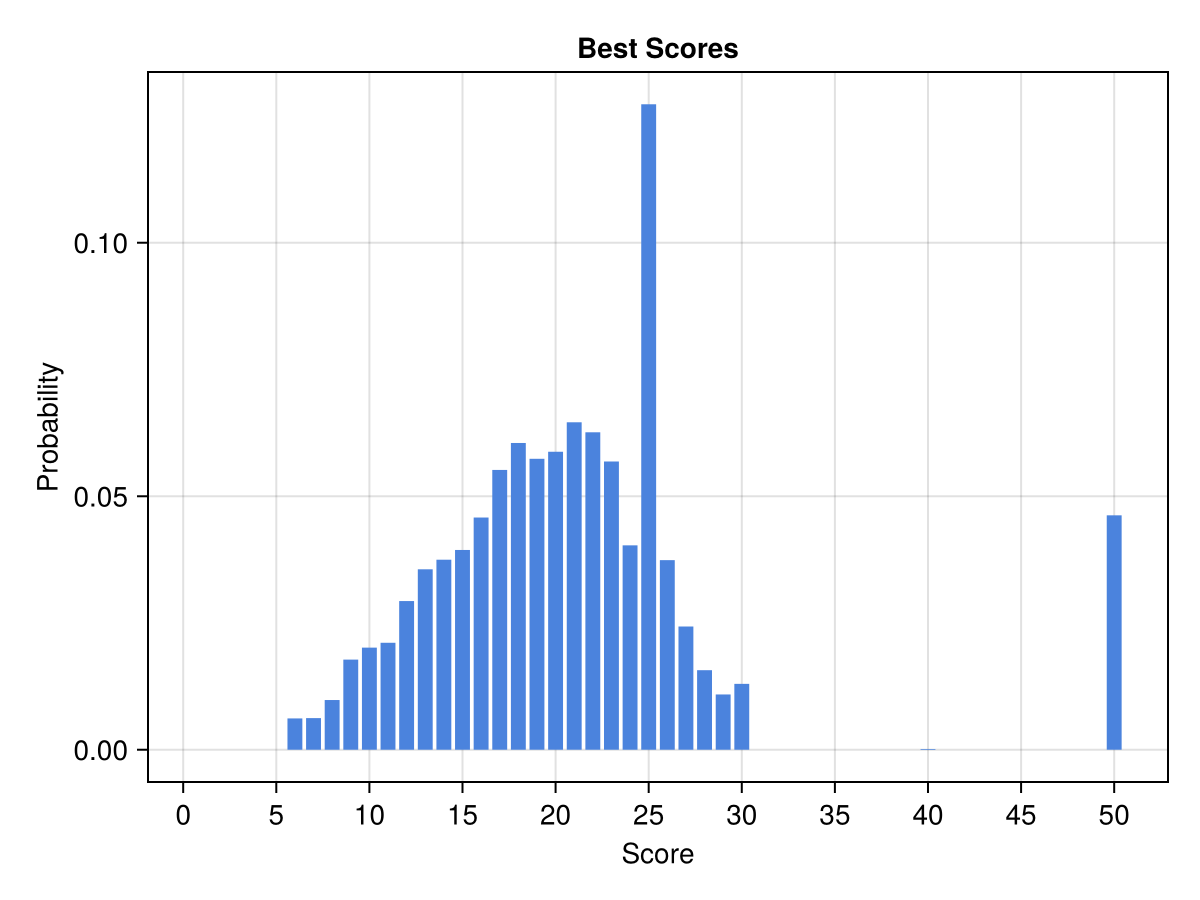

In [55]:
barplot(counts(yscores, 50)./1_000_000,
        color = "#4b83dd",
        axis = (xticks = 0:5:50, yticks = 0:0.05:1,
        xlabel = "Score", ylabel = "Probability",
        title = "Best Scores")
    )

In [56]:
analyze_results(yscores)


Results Summary:
Number of games: 1000000
Average score: 20.991439
Minimum score: 6
Maximum score: 50
Standard Deviation: 8.25202470943894


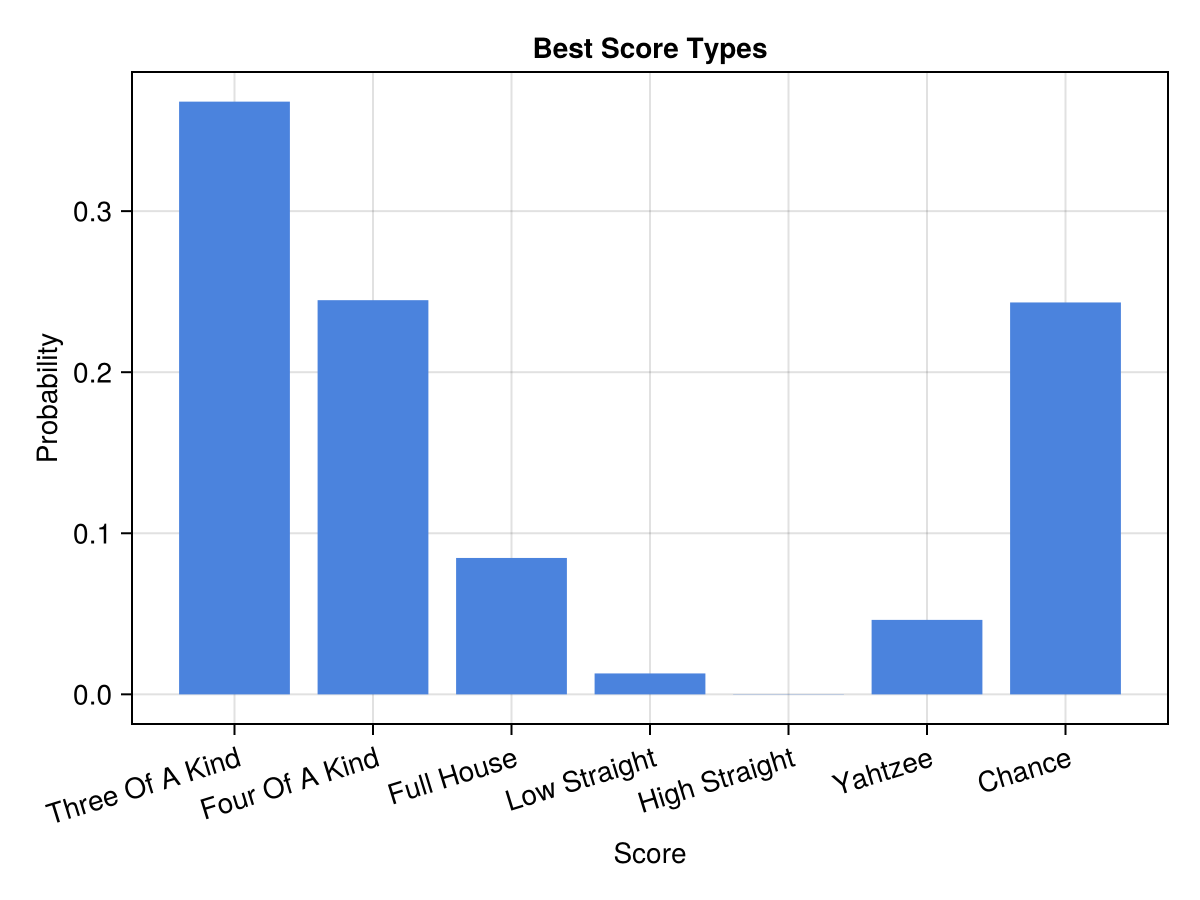

In [57]:
d = countmap(ytypes)
scoretypes = ["Three Of A Kind", "Four Of A Kind", "Full House", "Low Straight", "High Straight", "Yahtzee", "Chance"]
yscorecounts = Int[]
for i in scoretypes
    push!(yscorecounts, get!(d, i, 0))
end
yscorepers = yscorecounts./1_000_000
barplot(yscorepers, color = "#4b83dd",
            axis = (xticks = (1:7, scoretypes),
            xticklabelrotation = 0.3,
            yticks = 0:0.1:1,
            xlabel = "Score", ylabel = "Probability",
            title = "Best Score Types"))

In [58]:
@show hcat(scoretypes, yscorepers)

hcat(scoretypes, yscorepers) = Any["Three Of A Kind" 0.367956; "Four Of A Kind" 0.244702; "Full House" 0.084681; "Low Straight" 0.012992; "High Straight" 0.000144; "Yahtzee" 0.046234; "Chance" 0.243291]


7×2 Matrix{Any}:
 "Three Of A Kind"  0.367956
 "Four Of A Kind"   0.244702
 "Full House"       0.084681
 "Low Straight"     0.012992
 "High Straight"    0.000144
 "Yahtzee"          0.046234
 "Chance"           0.243291

#### Strategy Comparison

In [34]:
# barplot(vcat(scoretypes, scoretypes, scoretypes), vcat(iscorepers, sscorepers, yscorepers),
#             dodge = repeat(1:3,inner=4)
#             color = ["#e8a109", "#ef851a", "#4b83dd"],
#             axis = (xticks = (1:7, scoretypes),
#             xticklabelrotation = 0.3,
#             yticks = 0:0.1:1,
#             xlabel = "Score", ylabel = "Probability",
#             title = "Best Score Types"))


# fig = barplot(vcat(scoretypes,scoretypes,scoretypes),vcat(iscorepers,sscorepers,yscorepers),
#             dodge = repeat(1:3),
#             color=["#e8a109", "#ef851a", "#4b83dd"],
#             strokewidth = 1
#           )

In [69]:
pers = vcat(iscorepers, sscorepers, yscorepers)
bestscores = vcat(counts(iscores, 50)./1_000_000, counts(sscores, 50)./1_000_000, counts(yscores, 50)./1_000_000)

150-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.000605
 0.000651
 0.003194
 0.007881
 0.0161
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.046234

In [ ]:
# barplot(counts(yscores, 50)./1_000_000,
#         color = "#4b83dd",
#         axis = (xticks = 0:5:50, yticks = 0:0.05:1,
#         xlabel = "Score", ylabel = "Probability",
#         title = "Best Scores")
#     )

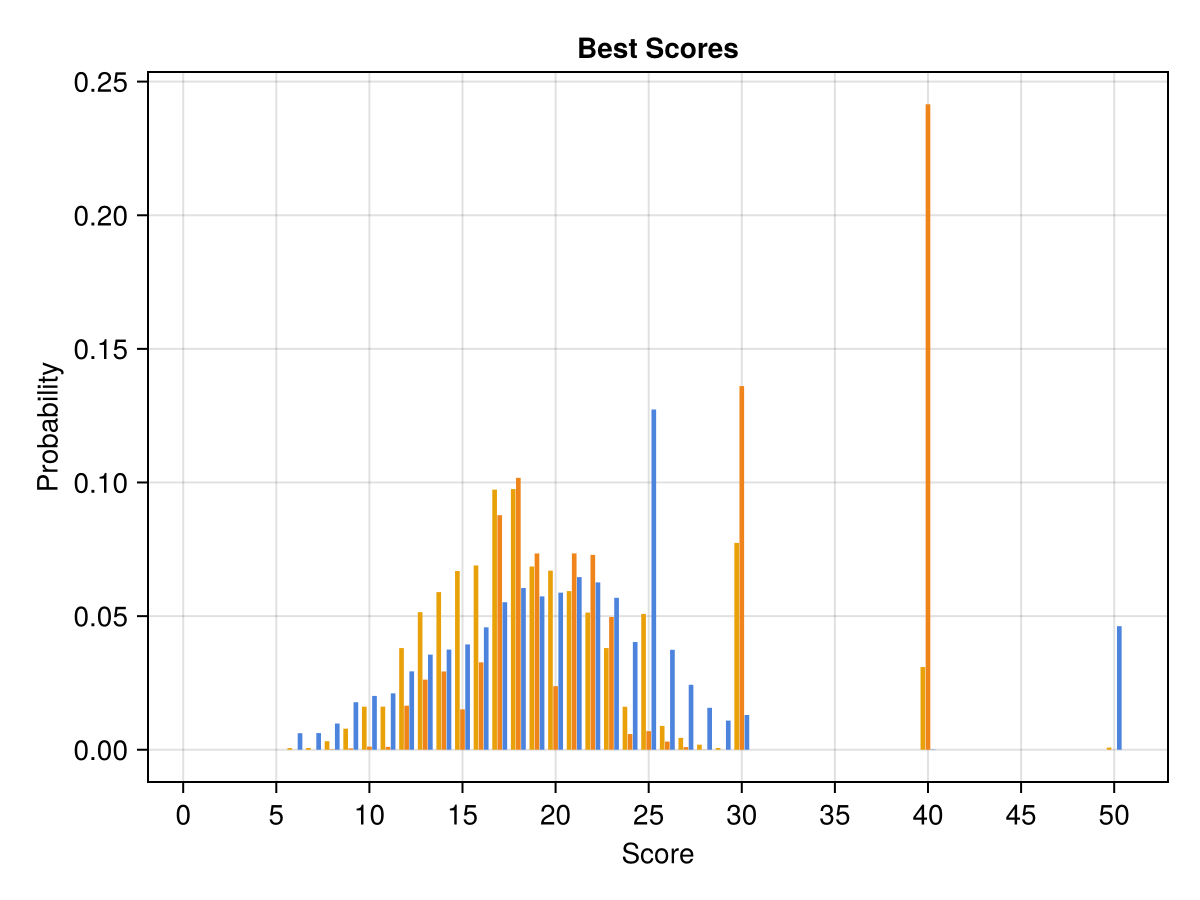

In [71]:
fig = Figure()
ax = Axis(fig[1,1], xticks=0:5:50, yticks = 0:0.05:1,
            xlabel = "Score", ylabel = "Probability",
            title = "Best Scores")
barplot!(ax, repeat(1:50, 3), bestscores, dodge=repeat(1:3, inner=50), color = repeat(["#e8a109", "#ef851a", "#4b83dd"], inner=50))
fig

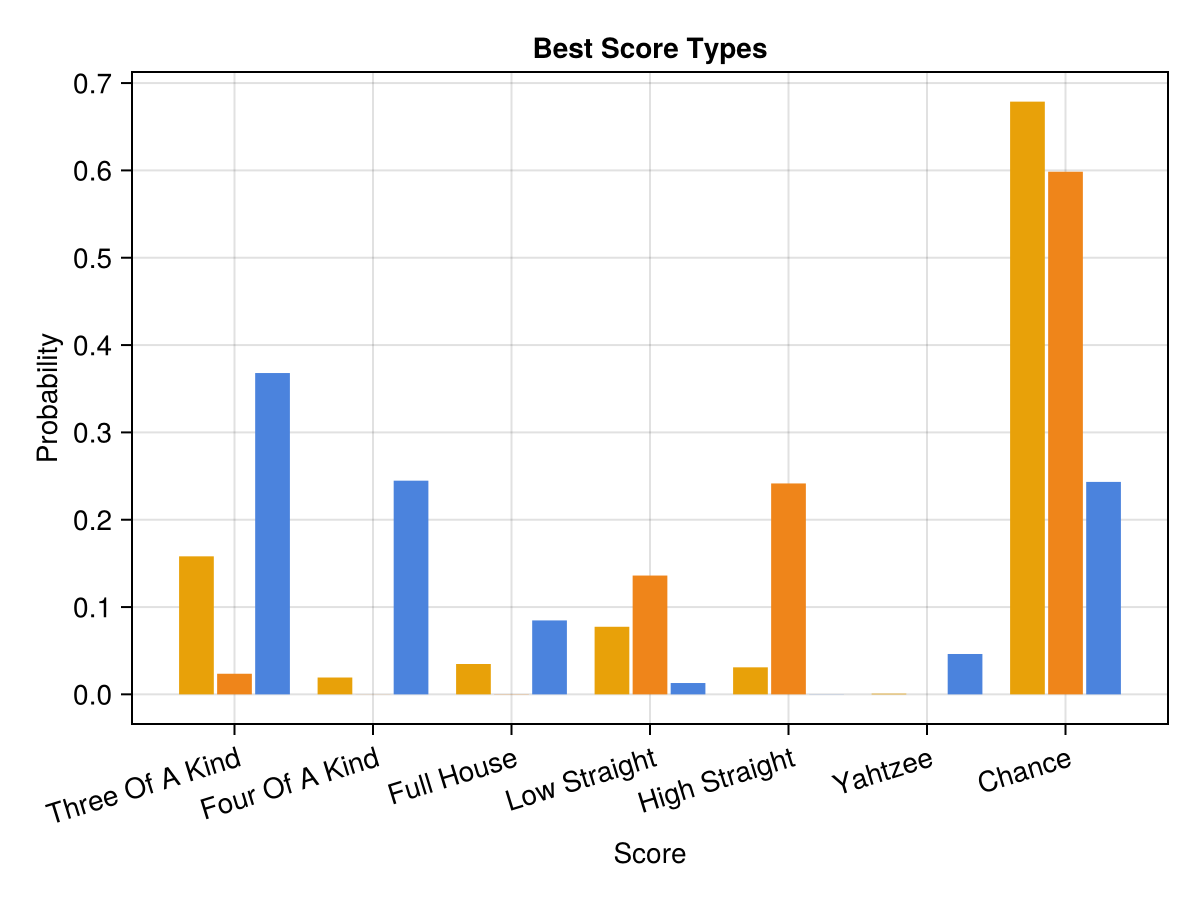

In [68]:
fig = Figure()
ax = Axis(fig[1,1], xticks=(1:7, scoretypes), xticklabelrotation = 0.3,
            yticks = 0:0.1:1,
            xlabel = "Score", ylabel = "Probability",
            title = "Best Score Types")
barplot!(ax, repeat(1:7, 3), pers, dodge=repeat(1:3, inner=7), color = repeat(["#e8a109", "#ef851a", "#4b83dd"], inner=7))
fig

In [72]:
["First Roll: 19.477", "Unique Strategy: 25.379", "Matching Strategy: 20.989"]

3-element Vector{String}:
 "First Roll: 19.477"
 "Unique Strategy: 25.379"
 "Matching Strategy: 20.989"